In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nrrd
from PIL import Image

Setting environment for an unknown machine. Global root paths must be set as env variables.


/home/adnewber/.local/lib/python2.7/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import nrrd
from PIL import Image
import numpy as np

root_fp = '/data2/Allen_Files/'
ANO, metaANO = nrrd.read(root_fp+'annotation_10.nrrd')

slice = ANO[:,:,400].astype(float)
slice /= np.max(slice)
im = Image.fromarray( np.uint8(plt.cm.jet(slice)*255) )


/usr/local/lib/python2.7/dist-packages/nrrd.py:267: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(decompressed_data[byteskip:], dtype)


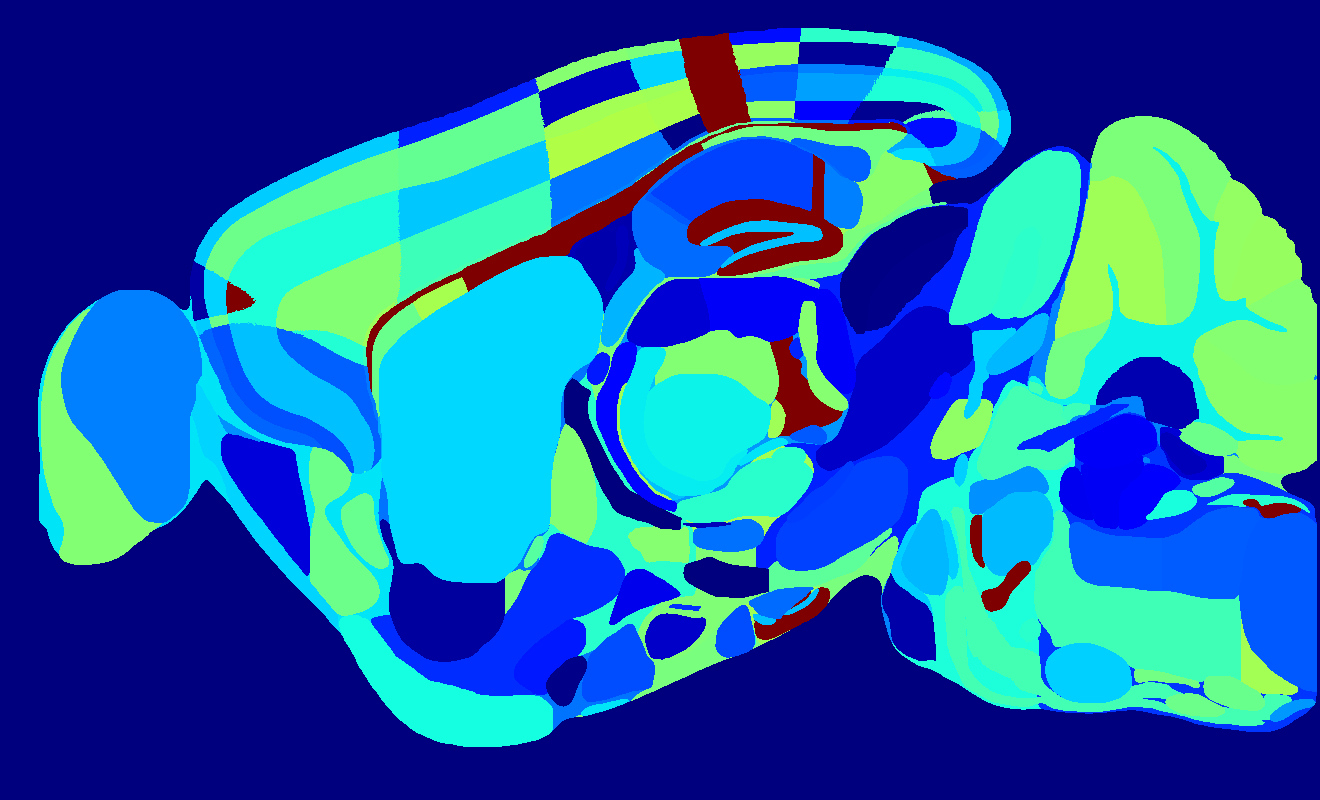

In [5]:
slice = ANO[:,:,400].astype(float)
slice /= 2000
im = Image.fromarray(np.uint8(plt.cm.jet(slice)*255))

im = im.rotate(270, expand=True)
im.transpose(Image.FLIP_LEFT_RIGHT)

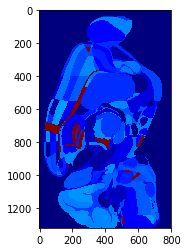

In [22]:
s = np.uint8(plt.cm.jet(ANO[:,:,400].astype(float)/4000)*255)
plt.imshow( s )

In [31]:
s[800, 400]

array([127,   0,   0, 255], dtype=uint8)

In [30]:
s[700, 150]

array([127,   0,   0, 255], dtype=uint8)

In [24]:
s[1150, 200]

array([  0, 128, 255, 255], dtype=uint8)

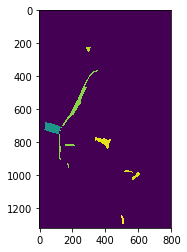

In [15]:
plt.imshow(slice/4000)

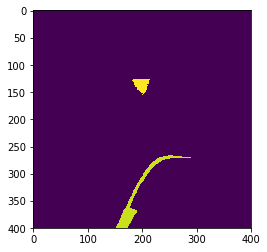

In [10]:
plt.imshow(slice[100:500,100:500])

In [7]:
slice[0,0]

0.0

In [ ]:
# http://help.brain-map.org/display/mouseconnectivity/API/

# -------------------------------
#
# Install pynrrd: https://github.com/mhe/pynrrd
#
# Download average_template_25.nrrd,
#          ara_nissl_25.nrrd,
#          ccf_2015/annotation_25.nrrd
#
# ---------------------------------
import nrrd
from PIL import Image
 
#
# Read image volume with NRRD reader
# Note that reader swaps the order of the first two axes
#
# AVGT = 3-D matrix of average_template
# NISSL = 3-D matrix of ara_nissl
# ANO = 3-D matrix of ccf_2015/annotation
#

root_fp = '/media/alexn/Data_2/Allen_Files/'

AVGT, metaAVGT = nrrd.read('average_template_25.nrrd');
NISSL, metaNISSL = nrrd.read('ara_nissl_25.nrrd');
ANO, metaANO = nrrd.read('annotation_25.nrrd');

# Save one coronal section as PNG
slice = AVGT[264,:,:].astype(float)
slice /= np.max(slice)
im = Image.fromarray(np.uint8(plt.cm.gray(slice)*255))
im.save('output/avgt_coronal.png')

slice = NISSL[264,:,:].astype(float)
slice /= np.max(slice)
im = Image.fromarray(np.uint8(plt.cm.gray(slice)*255))
im.save('output/nissl_coronal.png')

slice = ANO[264,:,:].astype(float)
slice /= 2000
im = Image.fromarray(np.uint8(plt.cm.jet(slice)*255))
im.save('output/ano_coronal.png')
 
# Save one sagittal section as PNG
slice = AVGT[:,:,220].astype(float)
slice /= np.max(slice)
im = Image.fromarray(np.uint8(plt.cm.gray(slice)*255))
im.save('output/avgt_sagittal.png')
 
slice = NISSL[:,:,220].astype(float)
slice /= np.max(slice)
im = Image.fromarray(np.uint8(plt.cm.gray(slice)*255))
im.save('output/nissl_sagittal.png')
 
slice = ANO[:,:,220].astype(float)
slice /= 2000
im = Image.fromarray(np.uint8(plt.cm.jet(slice)*255))
im.save('output/ano_sagittal.png')